In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
def preprocessing(datapath, col_name):
    data = pd.read_excel(datapath)
    data = data.transpose()
    data = data.iloc[2:]
    data = data.rename(
        columns={
            0:col_name
        })
    return data

In [3]:
telur_ayam = preprocessing("hargapangan/telur_ayam.xls","Telur Ayam")
minyak_goreng = preprocessing("hargapangan/minyak_goreng.xls","Minyak Goreng")
beras = preprocessing("hargapangan/beras.xls","Beras")

In [4]:
bawang_merah_putih = pd.read_excel("hargapangan/bawang_merah_putih.xls")
bawang_merah_putih = bawang_merah_putih.transpose()
bawang_merah_putih = bawang_merah_putih.iloc[2:]
bawang_merah_putih = bawang_merah_putih.rename(
    columns={0:'Bawang Merah',1:'Bawang Putih'}
)

In [5]:
beras.head()

,Beras
Jan 2018 (I),13000
Jan 2018 (II),13500
Jan 2018 (III),13700
Jan 2018 (IV),14000
Jan 2018 (V),14000


In [6]:
print(minyak_goreng.shape[0])
print(beras.shape[0])
print(telur_ayam.shape[0])
print(bawang_merah_putih.shape[0])

193
157
193
157


In [7]:
df_merge_col = pd.merge(telur_ayam, beras, left_index=True, right_index=True)
df_merge_col = pd.merge(df_merge_col, minyak_goreng, left_index=True, right_index=True)
df_merge_col = pd.merge(df_merge_col, bawang_merah_putih, left_index=True, right_index=True)

In [8]:
df_merge_col.head()

,Telur Ayam,Beras,Minyak Goreng,Bawang Merah,Bawang Putih
Jan 2018 (I),26050,13000,13500,28750,31250
Jan 2018 (II),25050,13500,13450,28700,31250
Jan 2018 (III),23750,13700,13450,26150,30750
Jan 2018 (IV),23100,14000,13450,25950,30250
Jan 2018 (V),22550,14000,13450,27300,30350


In [9]:
df_merge_col.shape

(157, 5)

In [10]:
df_merge_col.isnull().sum()

Telur Ayam       0
Beras            0
Minyak Goreng    0
Bawang Merah     0
Bawang Putih     0
dtype: int64

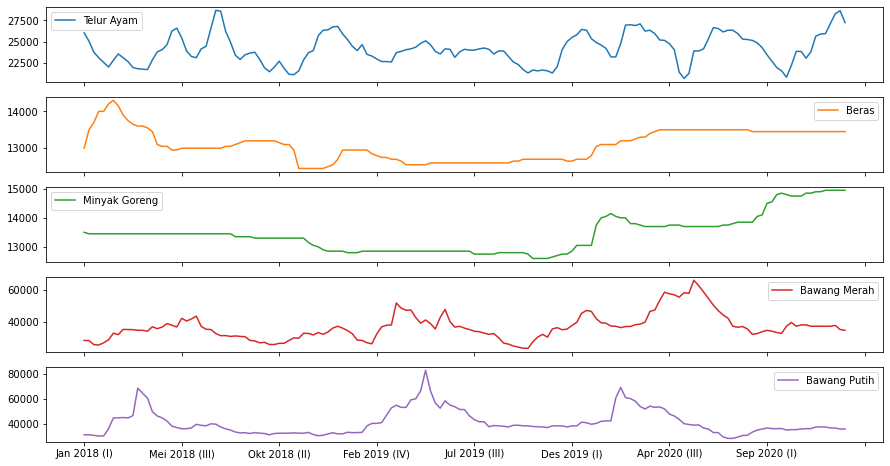

In [11]:
df_merge_col.plot(subplots=True, figsize=(15,8));

In [12]:
df_merge_col.to_csv("data_harga_pangan.csv", index=False)

In [19]:
df = pd.read_clipboard(header=None)
print(df.corr())

Empty DataFrame
Columns: []
Index: []


In [20]:
corr = df_merge_col.astype('float64').corr()
corr

,Telur Ayam,Beras,Minyak Goreng,Bawang Merah,Bawang Putih
Telur Ayam,1.000000,-0.009722,0.208945,0.206281,0.005603
Beras,-0.009722,1.000000,0.668120,0.156622,-0.129684
Minyak Goreng,0.208945,0.668120,1.000000,0.190613,-0.136822
Bawang Merah,0.206281,0.156622,0.190613,1.000000,0.315265
Bawang Putih,0.005603,-0.129684,-0.136822,0.315265,1.000000


In [ ]:
df_merge_col['Telur Ayam'].desc()